https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [4]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


In [5]:
x = dataset['x']
y = dataset['y']

In [6]:
x = (x - x.mean()) / x.std()
x

0   -1.264911
1   -0.632456
2    0.000000
3    0.632456
4    1.264911
Name: x, dtype: float64

In [7]:
#Grab the relevant data, scale the predictor variable, 
#and add a column of 1s for the gradient descent...

x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.26491106],
       [ 1.        , -0.63245553],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.63245553],
       [ 1.        ,  1.26491106]])

In [8]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 2.80, 1.42


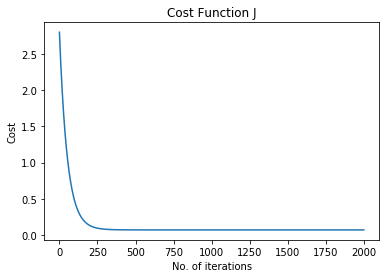

In [9]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [10]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable. Trying to use pillow instead.



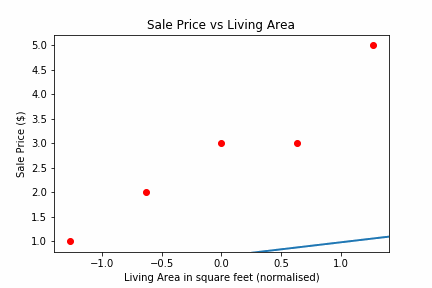

In [11]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))